<a href="https://colab.research.google.com/github/kuds/rl-atari-tennis/blob/main/%5BAtari%20Tennis%5D%20Single-Agent%20Reinforcement%20Learning%20PPO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Atari Tennis] Single-Agent Reinforcement Learning

In [1]:
!pip install swig

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 22.9 MB/s eta 0:00:00


In [2]:
!pip install gymnasium gymnasium[atari] autorom

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 25.4 MB/s eta 0:00:00


In [3]:
!AutoROM --accept-license

AutoROM will download the Atari 2600 ROMs.
They will be installed to:
	/usr/local/lib/python3.10/dist-packages/AutoROM/roms

Existing ROMs will be overwritten.
Installed /usr/local/lib/python3.10/dist-packages/AutoROM/roms/adventure.bin
Installed /usr/local/lib/python3.10/dist-packages/AutoROM/roms/air_raid.bin
Installed /usr/local/lib/python3.10/dist-packages/AutoROM/roms/alien.bin
Installed /usr/local/lib/python3.10/dist-packages/AutoROM/roms/amidar.bin
Installed /usr/local/lib/python3.10/dist-packages/AutoROM/roms/assault.bin
Installed /usr/local/lib/python3.10/dist-packages/AutoROM/roms/asterix.bin
Installed /usr/local/lib/python3.10/dist-packages/AutoROM/roms/asteroids.bin
Installed /usr/local/lib/python3.10/dist-packages/AutoROM/roms/atlantis.bin
Installed /usr/local/lib/python3.10/dist-packages/AutoROM/roms/atlantis2.bin
Installed /usr/local/lib/python3.10/dist-packages/AutoROM/roms/backgammon.bin
Installed /usr/local/lib/python3.10/dist-packages/AutoROM/roms/bank_heist.bin
Inst

In [4]:
!pip install stable-baselines3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.3/182.3 kB 9.1 MB/s eta 0:00:00


In [5]:
import platform
import torch
import numpy
import stable_baselines3
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_atari_env
from stable_baselines3.common.vec_env import VecFrameStack
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.callbacks import EvalCallback
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.callbacks import CallbackList
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.callbacks import CheckpointCallback
from stable_baselines3.common.vec_env import VecVideoRecorder
from stable_baselines3.common.vec_env import VecTransposeImage
import matplotlib.pyplot
import matplotlib
import os
import gymnasium
from importlib.metadata import version
from datetime import datetime
import csv
import time
import google.colab.drive

/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/util.py:55: DeprecationWarning: jax.xla_computation is deprecated. Please use the AOT APIs; see https://jax.readthedocs.io/en/latest/aot.html. For example, replace xla_computation(f)(*xs) with jit(f).lower(*xs).compiler_ir('hlo'). See CHANGELOG.md for 0.4.30 for more examples.
  from jax import xla_computation as _xla_computation


In [6]:
print(f"Python Version: {platform.python_version()}")
print(f"Torch Version: {version('torch')}")
print(f"Is Cuda Available: {torch.cuda.is_available()}")
print(f"Cuda Version: {torch.version.cuda}")
print(f"Gymnasium Version: {version('gymnasium')}")
print(f"Numpy Version: {version('numpy')}")
print(f"Stable Baselines3 Version: {version('stable_baselines3')}")

Python Version: 3.10.12
Torch Version: 2.4.1+cu121
Is Cuda Available: True
Cuda Version: 12.1
Gymnasium Version: 0.29.1
Numpy Version: 1.26.4
Stable Baselines3 Version: 2.3.2


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
gdrive_path = "/content/gdrive"
google.colab.drive.mount(gdrive_path, force_remount=True)

Mounted at /content/gdrive


In [8]:
rl_type = "PPO"
env_str = "ALE/Tennis-v5"
trained_model = "final_atari_tennis_dqn"
log_dir = "{}/MyDrive/Finding Theta/logs/{}/{}".format(gdrive_path,
                                                       env_str,
                                                       rl_type)
training_data_path = os.path.join(log_dir, "training jobs")
time_folder = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
model_folder_path = os.path.join(log_dir, "training jobs", time_folder)

#Create Folders
os.makedirs(log_dir, exist_ok=True)
os.makedirs(training_data_path, exist_ok=True)
os.makedirs(model_folder_path, exist_ok=True)

In [9]:
# https://danieltakeshi.github.io/2016/11/25/frame-skipping-and-preprocessing-for-deep-q-networks-on-atari-2600-games/
# https://stable-baselines3.readthedocs.io/en/master/common/atari_wrappers.html
env = make_atari_env(env_str, n_envs=1, seed=0)
print("Observation Space Size: ", env.observation_space.shape)
print('Actions Space: ', env.action_space)
env.close()

Observation Space Size:  (84, 84, 1)
Actions Space:  Discrete(18)


In [10]:
env = gymnasium.make(env_str)
print("Observation Space Size: ", env.observation_space.shape)
print('Actions Space: ', env.action_space)
env.close()

Observation Space Size:  (210, 160, 3)
Actions Space:  Discrete(18)


In [ ]:
# Evaluation Environment Wrapper Arguments
# Disable Frame Skipping
env_val_wrap_args = {"frame_skip": 0, "noop_max": 30}

In [ ]:
class VideoRecordCallback(BaseCallback):
    def __init__(
        self,
        save_path: str,
        video_length: int,
        save_freq: int = 5_000,
        name_prefix: str ="rl_model",
        verbose: int = 0):

        super().__init__(verbose)
        self.save_freq = save_freq
        self.video_length = video_length
        self.save_path = save_path
        self.name_prefix = name_prefix
        # Those variables will be accessible in the callback
        # (they are defined in the base class)
        # The RL model
        # self.model = None  # type: BaseAlgorithm
        # An alias for self.model.get_env(), the environment used for training
        # self.training_env # type: VecEnv
        # Number of time the callback was called
        # self.n_calls = 0  # type: int
        # num_timesteps = n_envs * n times env.step() was called
        # self.num_timesteps = 0  # type: int
        # local and global variables
        # self.locals = {}  # type: Dict[str, Any]
        # self.globals = {}  # type: Dict[str, Any]
        # The logger object, used to report things in the terminal
        # self.logger # type: stable_baselines3.common.logger.Logger
        # Sometimes, for event callback, it is useful
        # to have access to the parent object
        # self.parent = None  # type: Optional[BaseCallback]

    def _on_step(self) -> bool:
        if self.n_calls % self.save_freq == 0:

          name_prefix = f"{self.name_prefix}_steps_{self.num_timesteps}"

          # Record video of the best model playing Atari's Tennis
          rec_val = make_atari_env(
              env_str,
              n_envs=1,
              seed=1,
              wrapper_kwargs=env_val_wrap_args)
          rec_val = VecTransposeImage(rec_val)
          rec_val = VecFrameStack(rec_val, n_stack=4)
          rec_val = VecVideoRecorder(rec_val,
                                    self.save_path,
                                    video_length=self.video_length,
                                    record_video_trigger=lambda x: x == 0,
                                    name_prefix=name_prefix)

          obs = rec_val.reset()
          for _ in range(self.video_length):
              action, _states = self.model.predict(obs)
              obs, rewards, dones, info = rec_val.step(action)
              rec_val.render()
              if dones:
                break

          rec_val.close()
        return True

In [ ]:
# Create Environments
# Create the Training Atari Tennis environment with appropriate wrappers
env = make_atari_env(env_str, n_envs=4, seed=0)
env = VecTransposeImage(env)
env = VecFrameStack(env, n_stack=4)

# Create the Evaluation Atari Tennis environment with appropriate wrappers
# Disable Frame Skip
env_val = make_atari_env(
    env_str,
    n_envs=1,
    seed=1,
    wrapper_kwargs=env_val_wrap_args)
env_val = VecTransposeImage(env_val)
env_val = VecFrameStack(env_val, n_stack=4)

In [ ]:
# Create Callbacks
# Create Evaluation Callback
# eval_freq - can cause learning instability if set to low
eval_callback = EvalCallback(
    env_val,
    best_model_save_path=model_folder_path,
    log_path=model_folder_path,
    eval_freq=10_000,
    render=False,
    deterministic=True,
    n_eval_episodes=5)

# Create Checkpoint Callback
checkpoint_callback = CheckpointCallback(
    save_freq=10_000,
    save_path=os.path.join(model_folder_path, "checkpoints"),
    name_prefix="atari_tennis_ppo",
    save_replay_buffer=False,
    save_vecnormalize=False,
)

video_record_callback = VideoRecordCallback(
    save_path=os.path.join(model_folder_path, "videos"),
    video_length=5_000,
    save_freq=10_000,
    name_prefix="atari_tennis_ppo")

# Create the callback list
callbackList = CallbackList([checkpoint_callback, video_record_callback, eval_callback])

In [ ]:
# Initialize PPO
# ent_coef - encourages exploration of other actins
model = PPO("CnnPolicy",
            env,
            verbose=0,
            batch_size=512,
            n_steps=128,
            gamma=0.99,
            gae_lambda=0.95,
            n_epochs=4,
            ent_coef=0.05,
            tensorboard_log=os.path.join(log_dir, "tensorboard"))

# Train the model
model.learn(total_timesteps=10_000_000,
            progress_bar=False,
            callback=callbackList)

# Save the trained model
model.save(os.path.join(model_folder_path, trained_model))

env.close()
env_val.close()

  32% ━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3,199,984/10,000,000  [ 8:13:52 < 27:16:40 , 69 it/s ]

In [20]:
# # Get model path from last training job (uncomment if training job interrupted)
# # List all entries in the directory
# entries = os.listdir(training_data_path)

# # Filter out only directories
# folders = [entry for entry in entries if os.path.isdir(os.path.join(training_data_path, entry))]

# # Sort the folders alphabetically
# folders.sort()

# # Get the last folder
# model_folder_path = os.path.join(training_data_path, folders[-1])
# print(model_folder_path)

/content/gdrive/MyDrive/Finding Theta/logs/ALE/Tennis-v5/PPO/training jobs/2024-09-26 16:10:59


In [26]:
# Create the Evaluation Atari Tennis environment with appropriate wrappers
env_val = make_atari_env(env_str,
                         n_envs=1,
                         seed=1,
                         wrapper_kwargs=env_val_wrap_args)
env_val = VecTransposeImage(env_val)
env_val = VecFrameStack(env_val, n_stack=4)

# Load the best model
best_model_path = os.path.join(model_folder_path, "best_model")
best_model = DQN.load(best_model_path, env=env_val)

mean_reward, std_reward = evaluate_policy(
    best_model,
    env_val,
    n_eval_episodes=5)
print(f"Best Model - Mean reward: {mean_reward:.2f} +/- {std_reward:.2f}")

best_metrics_path = os.path.join(log_dir, "best_model_metrics.csv")

# Create Best Model Metrics file if not there
if(not os.path.isfile(best_metrics_path)):
  with open(best_metrics_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["run_date",
                     "batch_size",
                     "ent_coef",
                     "learning_rate",
                     "num_timesteps",
                     "mean_reward",
                     "std_reward",
                     "n_steps",
                     "n_envs",
                     "gamma",
                     "gae_lambda",
                     "clip_range_vf",
                     "n_epochs"])

new_data = [os.path.basename(os.path.normpath(model_folder_path)),
            best_model.batch_size,
            best_model.ent_coef,
            best_model.learning_rate,
            best_model.num_timesteps,
            mean_reward,
            std_reward,
            best_model.n_steps,
            best_model.n_envs,
            best_model.gamma,
            best_model.gae_lambda,
            best_model.clip_range_vf,
            best_model.n_epochs]

with open(best_metrics_path, 'a', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(new_data)

# Record video of the best model playing Atari's Tennis
rec_val = VecVideoRecorder(env_val,
                           os.path.join(model_folder_path, "videos"),
                           video_length=5_000,
                           record_video_trigger=lambda x: x == 0,
                           name_prefix="best_model_atari_tennis_dqn")

obs = rec_val.reset()
for _ in range(5000):
    action, _states = best_model.predict(obs)
    obs, rewards, dones, info = rec_val.step(action)
    rec_val.render()
    if dones:
      break

env_val.close()
rec_val.close()

Best Model - Mean reward: -1.00 +/- 0.00


/usr/local/lib/python3.10/dist-packages/gymnasium/utils/passive_env_checker.py:335: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(


Saving video to /content/gdrive/MyDrive/Finding Theta/logs/ALE/Tennis-v5/PPO/training jobs/2024-09-26 16:10:59/videos/best_model_atari_tennis_ppo-step-0-to-step-5000.mp4
Moviepy - Building video /content/gdrive/MyDrive/Finding Theta/logs/ALE/Tennis-v5/PPO/training jobs/2024-09-26 16:10:59/videos/best_model_atari_tennis_ppo-step-0-to-step-5000.mp4.
Moviepy - Writing video /content/gdrive/MyDrive/Finding Theta/logs/ALE/Tennis-v5/PPO/training jobs/2024-09-26 16:10:59/videos/best_model_atari_tennis_ppo-step-0-to-step-5000.mp4



Moviepy - Done !
Moviepy - video ready /content/gdrive/MyDrive/Finding Theta/logs/ALE/Tennis-v5/PPO/training jobs/2024-09-26 16:10:59/videos/best_model_atari_tennis_ppo-step-0-to-step-5000.mp4


In [22]:
# Create the Evaluation Atari Tennis environment with appropriate wrappers
# Disable Frame Skip
env_val_wrap_args = {"frame_skip": 0, "noop_max": 30}
env_val = make_atari_env(env_str,
                         n_envs=1,
                         seed=1,
                         wrapper_kwargs=env_val_wrap_args)
env_val = VecTransposeImage(env_val)
env_val = VecFrameStack(env_val, n_stack=4)

final_model_path = os.path.join(model_folder_path, trained_model)

if(not os.path.isfile(final_model_path)):
  # Load last checkpoint model
  print("Loading last checkpoint model")

  checkpoint_path = os.path.join(model_folder_path, "checkpoints")
  entries = os.listdir(checkpoint_path)

  # Filter out only directories
  folders = [entry for entry in entries if os.path.isfile(os.path.join(checkpoint_path, entry))]

  # Get the last folder
  final_model_path = os.path.join(checkpoint_path, folders[-1])
  print(final_model_path)
else:
  # Load final model
  print("Loading final model")

final_model = PPO.load(final_model_path, env=env_val)

# Record video of the final model playing Atari's Tennis
rec_val = VecVideoRecorder(env_val,
                           os.path.join(model_folder_path, "videos"),
                           video_length=5000,
                           record_video_trigger=lambda x: x == 0,
                           name_prefix="final_model_atari_tennis_ppo")

obs = rec_val.reset()
for _ in range(5000):
    action, _states = final_model.predict(obs)
    obs, rewards, dones, info = rec_val.step(action)
    rec_val.render()
    if dones:
      break

env_val.close()
rec_val.close()

Loading last checkpoint model
/content/gdrive/MyDrive/Finding Theta/logs/ALE/Tennis-v5/PPO/training jobs/2024-09-26 16:10:59/checkpoints/atari_tennis_ppo_3200000_steps.zip


/usr/local/lib/python3.10/dist-packages/gymnasium/utils/passive_env_checker.py:335: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(


Saving video to /content/gdrive/MyDrive/Finding Theta/logs/ALE/Tennis-v5/PPO/training jobs/2024-09-26 16:10:59/videos/final_model_atari_tennis_ppo-step-0-to-step-5000.mp4
Moviepy - Building video /content/gdrive/MyDrive/Finding Theta/logs/ALE/Tennis-v5/PPO/training jobs/2024-09-26 16:10:59/videos/final_model_atari_tennis_ppo-step-0-to-step-5000.mp4.
Moviepy - Writing video /content/gdrive/MyDrive/Finding Theta/logs/ALE/Tennis-v5/PPO/training jobs/2024-09-26 16:10:59/videos/final_model_atari_tennis_ppo-step-0-to-step-5000.mp4



Moviepy - Done !
Moviepy - video ready /content/gdrive/MyDrive/Finding Theta/logs/ALE/Tennis-v5/PPO/training jobs/2024-09-26 16:10:59/videos/final_model_atari_tennis_ppo-step-0-to-step-5000.mp4


In [23]:
# Print Model
print(best_model.policy)

ActorCriticCnnPolicy(
  (features_extractor): NatureCNN(
    (cnn): Sequential(
      (0): Conv2d(4, 32, kernel_size=(8, 8), stride=(4, 4))
      (1): ReLU()
      (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2))
      (3): ReLU()
      (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
      (5): ReLU()
      (6): Flatten(start_dim=1, end_dim=-1)
    )
    (linear): Sequential(
      (0): Linear(in_features=3136, out_features=512, bias=True)
      (1): ReLU()
    )
  )
  (pi_features_extractor): NatureCNN(
    (cnn): Sequential(
      (0): Conv2d(4, 32, kernel_size=(8, 8), stride=(4, 4))
      (1): ReLU()
      (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2))
      (3): ReLU()
      (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
      (5): ReLU()
      (6): Flatten(start_dim=1, end_dim=-1)
    )
    (linear): Sequential(
      (0): Linear(in_features=3136, out_features=512, bias=True)
      (1): ReLU()
    )
  )
  (vf_features_extractor): NatureCNN(
    (cnn): 

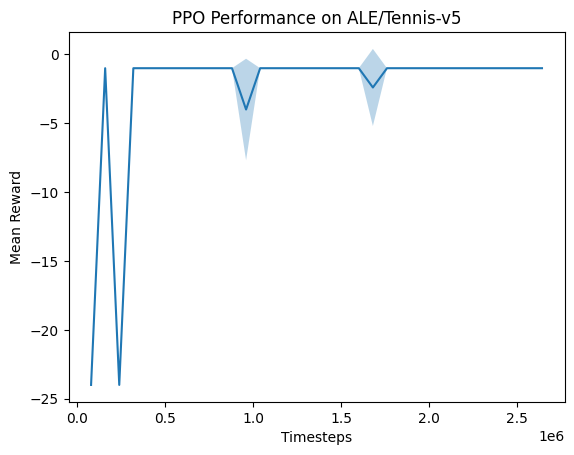

In [24]:
# Load the evaluations.npz file
data = numpy.load(os.path.join(model_folder_path, "evaluations.npz"))

# Extract the relevant data
timesteps = data['timesteps']
results = data['results']

# Calculate the mean and standard deviation of the results
mean_results = numpy.mean(results, axis=1)
std_results = numpy.std(results, axis=1)

# Plot the results
matplotlib.pyplot.figure()
matplotlib.pyplot.plot(timesteps, mean_results)
matplotlib.pyplot.fill_between(timesteps,
                               mean_results - std_results,
                               mean_results + std_results,
                               alpha=0.3)

matplotlib.pyplot.xlabel('Timesteps')
matplotlib.pyplot.ylabel('Mean Reward')
matplotlib.pyplot.title(f"{rl_type} Performance on {env_str}")
matplotlib.pyplot.show()